# Predicting Cervical Cancer

## Phase-1 Data Preperation and Visualisation

### Group Members- Jasika Verma (3989980) , Priya Ningappa Madabal (3959738)

## Table of Contents

* [Introduction](#Introduction)
    + [Dataset Source](#Dataset-Source)
    + [Dataset Details](#Dataset-Details)
    + [Dataset Retrieval](#Dataset-Retrieval)
    + [Dataset Features](#Dataset-Features)
    + [Target Feature](#Target-Feature)
* [Goals and Objective](#Goals-and-Objective)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
    + [Random Sampling](#Random-Sampling)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
    + [One Variable Visualisation](#One-Variable-Visualisation)
    + [Two Variable Visualisation](#Two-Variable-Visualisation)
    + [Three Variable Visualisation](#Three-Variable-Visualisation)
* [Literature Review](#Literature-Review)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)

## Introduction

### Dataset Source

The Predicting Cervical Cancer dataset used in study was sourced from Kaggle (RANZEET RAUT, 2023). The dataset contains various patient attributes, including demographic data, sexual behavior, smoking habits, contraceptive usage, history of sexually transmitted diseases (STDs), and diagnostic outcomes related to cervical cancer. These attributes will be used to develop a machine learning model for predicting the risk of cervical cancer, facilitating early detection and timely intervention.

### Dataset Details 

The dataset contains a range of demographic, clinical, and pathological details pertaining to individuals diagnosed with cervical cancer. The dataset contains <b> 36 features and 835 observations </b>. These details encompass factors such as age, sexual history, smoking history, specific characteristics of tumors, types of treatments received, and outcomes related to survival. Each entry in the dataset corresponds to a distinct patient, with columns representing diverse aspects relevant to the diagnosis and treatment of cervical cancer.


### Dataset Retrieval

We'll import the dataset named "Phase1_Group21.csv" into our Jupyter Notebook and showcase a random selection of 10 rows from it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 

### Reading the dataset 
df = pd.read_csv("Phase1_Group21.csv", sep = ',', decimal = ".", na_values = "-", index_col=False)
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [2]:
# Randomly displaying 10 observations from our dataset. 
df.sample(10, random_state=999)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
238,24,1.0,16.0,3.0,0.0,0.0,0.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
100,30,5.0,16.0,4.0,0.0,0.0,0.0,0.0,0.00,1.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,11.0,11.0,0,0,0,0,0,0,1,0
437,17,3.0,16.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0
567,35,3.0,14.0,6.0,1.0,15.0,3.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
758,18,5.0,14.0,1.0,1.0,3.0,1.2,1.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
90,35,3.0,16.0,5.0,0.0,0.0,0.0,1.0,4.00,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
696,21,5.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
793,21,2.0,19.0,NaN,0.0,0.0,0.0,1.0,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0
414,26,3.0,15.0,NaN,0.0,0.0,0.0,1.0,0.33,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,1,1,0,1
440,16,1.0,16.0,1.0,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.shape

(835, 36)

## Dataset Features 

The features in our dataset are described in the table below. Some of these descriptions are taken from the Kaggle data source and some are personal interpretation
Note: The table contains the features that are going to be used in the analysis and further in phase-2 

In [4]:
from tabulate import tabulate

table = [['Name', 'Data Type', 'Units', 'Description'],
         ['Age', 'Numeric', 'NA', 'Age of the individual'],
         ['Number of sexual partners', 'Numeric', 'NA', 'Number of sexual partners'],
         ['First sexual intercourse', 'Numeric', 'NA', 'Age at first sexual intercourse'],
         ['Num of pregnancies', 'Numeric', 'NA', 'Number of pregnancies'],
         ['Smokes', 'Binary', 'NA', 'Whether the individual smokes (0 = No, 1 = Yes)'],
         ['Smokes (years)', 'Numeric', 'NA', 'Number of years smoked'],
         ['Smokes (packs/year)', 'Numeric', 'NA', 'Number of packs of cigarettes smoked per year'],
         ['Hormonal Contraceptives', 'Binary', 'NA', 'Whether the individual used hormonal contraceptives (0 = No, 1 = Yes)'],
         ['Hormonal Contraceptives (years)', 'Numeric', 'NA', 'Number of years using hormonal contraceptives'],
         ['IUD', 'Binary', 'NA', 'Whether the individual used an intrauterine device (0 = No, 1 = Yes)'],
         ['IUD (years)', 'Numeric', 'NA', 'Number of years using an intrauterine device'],
         ['STDs', 'Binary', 'NA', 'Whether the individual has STDs (0 = No, 1 = Yes)'],
         ['STDs (number)', 'Numeric', 'NA', 'Number of STDs'],
         ['Dx:Cancer', 'Binary', 'NA', 'Diagnosis of Cancer (0 = No, 1 = Yes)'],
         ['Dx:CIN', 'Binary', 'NA', 'Diagnosis of CIN (0 = No, 1 = Yes)'],
         ['Dx:HPV', 'Binary', 'NA', 'Diagnosis of HPV (0 = No, 1 = Yes)'],
         ['Dx', 'Binary', 'NA', 'Diagnosis (0 = No, 1 = Yes)'],
         ['Hinselmann', 'Binary', 'NA', 'Hinselmann test result (0 = No, 1 = Yes)'],
         ['Schiller', 'Binary', 'NA', 'Schiller test result (0 = No, 1 = Yes)'],
         ['Citology', 'Binary', 'NA', 'Cytology test result (0 = No, 1 = Yes)'],
         ['Biopsy', 'Binary', 'NA', 'Biopsy result (0 = Not Cancerous, 1 = Is Cancerous)']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



╒═════════════════════════════════╤═════════════╤═════════╤═══════════════════════════════════════════════════════════════════════╕
│ Name                            │ Data Type   │ Units   │ Description                                                           │
╞═════════════════════════════════╪═════════════╪═════════╪═══════════════════════════════════════════════════════════════════════╡
│ Age                             │ Numeric     │ NA      │ Age of the individual                                                 │
├─────────────────────────────────┼─────────────┼─────────┼───────────────────────────────────────────────────────────────────────┤
│ Number of sexual partners       │ Numeric     │ NA      │ Number of sexual partners                                             │
├─────────────────────────────────┼─────────────┼─────────┼───────────────────────────────────────────────────────────────────────┤
│ First sexual intercourse        │ Numeric     │ NA      │ Age at first sex

## Target Feature

The target feature for our dataset will be <b> Biopsy </b>. Predicting the biopsy result, whether positive or negative for cervical cancer, is crucial for early detection and treatment planning. It is a <u> categorical variable with two values 0,1.  </u> Number 1  biopsy result indicates the presence of abnormal cervical cells, suggesting the likelihood of cervical cancer, while a 0 result suggests the absence of cancerous cells. By accurately predicting biopsy results, healthcare providers can initiate timely interventions for patients at risk, potentially improving treatment outcomes and patient prognosis

## Goals and Objective

Addressing the global health challenge posed by cervical cancer, particularly among women, is the primary focus of this project. Its main objective is to devise a predictive model using machine learning techniques that accurately identifies individuals at risk of cervical cancer based on pertinent demographic, clinical, and pathological features. By doing so, the project aims to facilitate timely intervention and medical care for those deemed high-risk, potentially revolutionizing early detection efforts and ultimately saving lives through targeted screening and preventive measures.

Moreover, the project seeks to ascertain the most influential predictors of cervical cancer risk. By comprehensively analyzing the dataset and employing feature selection methods, the goal is to uncover key contributing factors. This knowledge can empower healthcare professionals to better identify high-risk patients and implement tailored preventive strategies, thereby bolstering the accuracy and efficacy of the predictive model.

Additionally, the project places significant emphasis on exploratory data analysis (EDA) to gain deeper insights into the dataset's characteristics. Through EDA, including the examination of feature distributions, variable correlations, and underlying patterns or trends, the project aims to unearth valuable relationships and anomalies. This process guides subsequent data preprocessing and modeling endeavors, ensuring that the dataset is suitably prepared and optimizing the performance and dependability of the predictive model.

## Data Cleaning and Preprocessing 

In the following steps, we describe data cleaning and preprocessing steps taken for this project
 * drop irrelevant features
 * Check for missing values
 * Remove rows with missing values
 * column mapping
 * random sampling 

In [5]:
# lets first see all the columns in our dataset. 
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
# lets drop the columns that are not needed
cancer = df.drop(columns=["STDs:condylomatosis", "STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vaginal condylomatosis",
                             "STDs:vulvo-perineal condylomatosis", "STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum",
                             "STDs:AIDS","STDs:HIV", "STDs:Hepatitis B", "STDs:HPV","STDs: Number of diagnosis","STDs: Time since first diagnosis","STDs: Time since last diagnosis"
                             ]) 
                           

In [7]:
# Now let us see the number of null values in our dataset for each feature
cancer.isna().sum()

Age                                  0
Number of sexual partners           25
First sexual intercourse             7
Num of pregnancies                  56
Smokes                              13
Smokes (years)                      13
Smokes (packs/year)                 13
Hormonal Contraceptives            103
Hormonal Contraceptives (years)    103
IUD                                112
IUD (years)                        112
STDs                               100
STDs (number)                      100
Dx:Cancer                            0
Dx:CIN                               0
Dx:HPV                               0
Dx                                   0
Hinselmann                           0
Schiller                             0
Citology                             0
Biopsy                               0
dtype: int64

We see that there are many NaN values in our datset, to deal with them we remove all the rows with NaN values and retain only the ones which have values for all the features

In [8]:
# Now from the dataset cancer, we remove all the rows that have NaN values
cancer = cancer.dropna()
cancer.shape

(650, 21)

In [9]:
# Removing white space and turning column names to lower case.
cancer.columns = cancer.columns.str.lower().str.strip()

# Define the columns mapping for renaming
columns_mapping = {
    'number of sexual partners': 'number_of_sexual_partners',
    'first sexual intercourse': 'first_sexual_intercourse',
    'num of pregnancies': 'num_of_pregnancies',
    'smokes': 'smokes',
    'smokes (years)': 'smokes_years',
    'smokes (packs/year)': 'smokes_packs_per_year',
    'hormonal contraceptives': 'hormonal_contraceptives',
    'hormonal contraceptives (years)': 'hormonal_contraceptives_years',
    'iud': 'iud',
    'iud (years)': 'iud_years',
    'stds': 'stds',
    'stds (number)': 'stds_number',
    'dx:cancer': 'dx_cancer',
    'dx:cin': 'dx_cin',
    'dx:hpv': 'dx_hpv',
    'dx': 'dx',
    'hinselmann': 'hinselmann',
    'schiller': 'schiller',
    'citology': 'citology',
    'biopsy': 'biopsy'
}
# Rename columns
cancer = cancer.rename(columns=columns_mapping)
cancer.sample(5, random_state=999)

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_years,smokes_packs_per_year,hormonal_contraceptives,hormonal_contraceptives_years,iud,iud_years,stds,stds_number,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
212,28,3.0,15.0,6.0,1.0,14.0,2.1,1.0,7.00,1.0,4.0,1.0,2.0,0,0,0,0,0,0,0,0
625,16,1.0,15.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0
744,21,1.0,14.0,2.0,0.0,0.0,0.0,1.0,4.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
168,18,3.0,18.0,4.0,0.0,0.0,0.0,1.0,5.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
418,16,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [10]:
# Now we check for the datatypes
cancer.dtypes

age                                int64
number_of_sexual_partners        float64
first_sexual_intercourse         float64
num_of_pregnancies               float64
smokes                           float64
smokes_years                     float64
smokes_packs_per_year            float64
hormonal_contraceptives          float64
hormonal_contraceptives_years    float64
iud                              float64
iud_years                        float64
stds                             float64
stds_number                      float64
dx_cancer                          int64
dx_cin                             int64
dx_hpv                             int64
dx                                 int64
hinselmann                         int64
schiller                           int64
citology                           int64
biopsy                             int64
dtype: object

In [11]:
cancer.describe(include = ["int64", "float64"]).T

,count,mean,std,min,25%,50%,75%,max
age,650.0,27.492308,8.698552,13.0,21.0,26.0,33.0,84.0
number_of_sexual_partners,650.0,2.549231,1.650010,1.0,2.0,2.0,3.0,28.0
first_sexual_intercourse,650.0,17.173846,2.863445,10.0,15.0,17.0,18.0,32.0
num_of_pregnancies,650.0,2.352308,1.472041,0.0,1.0,2.0,3.0,11.0
smokes,650.0,0.147692,0.355068,0.0,0.0,0.0,0.0,1.0
smokes_years,650.0,1.269738,4.246248,0.0,0.0,0.0,0.0,37.0
smokes_packs_per_year,650.0,0.471663,2.367218,0.0,0.0,0.0,0.0,37.0
hormonal_contraceptives,650.0,0.655385,0.475609,0.0,0.0,1.0,1.0,1.0
hormonal_contraceptives_years,650.0,2.343330,3.756819,0.0,0.0,0.5,3.0,22.0
iud,650.0,0.115385,0.319732,0.0,0.0,0.0,0.0,1.0


## Random Sampling

Out the remaining 650 rows we randomly chose 300 for our project 

In [12]:
cancer = cancer.sample(n=300, random_state=999)
cancer.shape

(300, 21)

## Data Exploration and Visualisation

### Single Variable Visualisation

#### Histogram to see the distribution of Age of the Patients

A histogram visually displays the distribution of patients' ages, providing insight into the range of different age groups within the dataset.

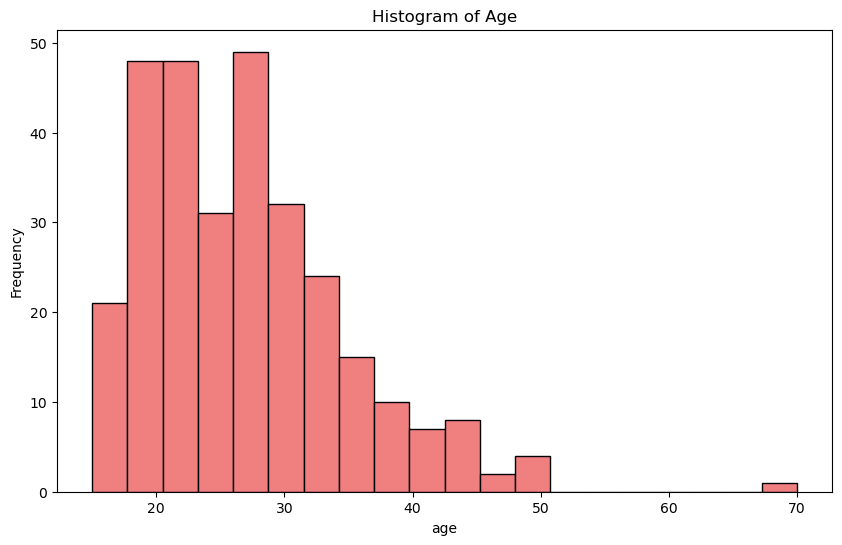

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(cancer['age'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

The histogram suggests that the majority of patients in the dataset are younger, with a notable peak in frequency around the age of 30. This distribution indicates that there are fewer patients in the older age groups compared to the younger ones, implying a right-skewed age distribution. Overall, the visualization provides insights into the age distribution of patients, highlighting the prevalence of individuals in their late twenties to early thirties within the dataset.

#### Pie Chart to see the percentage of patients that have used Hormonal contraceptives

A pie chart visually represents the proportion of patients who have used hormonal contraceptives, displaying the distribution of this categorical variable as percentages of the whole.

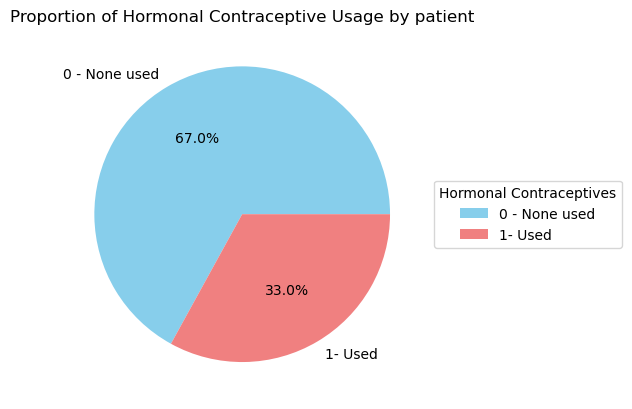

In [14]:
plt.pie(cancer['hormonal_contraceptives'].value_counts(), labels=['0 - None used', '1- Used'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Hormonal Contraceptive Usage by patient')
plt.legend(title='Hormonal Contraceptives', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

From the pie chart, it is evident that approximately 67% of the patients in the dataset have not used hormonal contraceptives, while around 33% have used hormonal contraceptives. 

#### Bar Chart to show the count of patients who smoke 

A bar chart visually represents the count of patients who smoke, providing a clear comparison of the frequency of smoking among different groups or categories within the dataset.

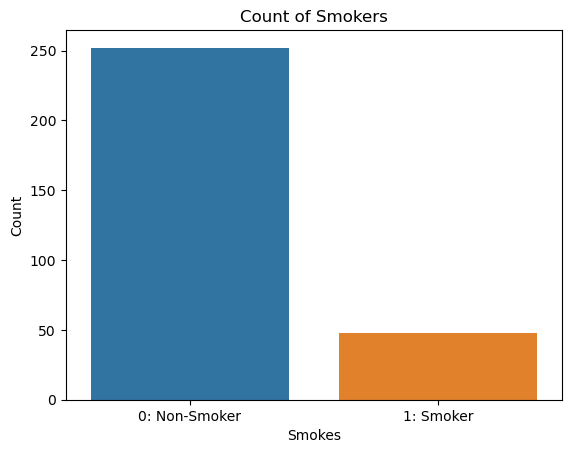

In [15]:
sns.countplot(x='smokes', data=cancer)
plt.title('Count of Smokers')
plt.xlabel('Smokes')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0: Non-Smoker', '1: Smoker'])
plt.show()

From the bar chart, it can be deduced that a larger proportion of patients in the dataset do not smoke compared to those who smoke. The count of non-smokers is significantly higher than the count of smokers, indicating that smoking may not be prevalent among the patients in the dataset.

### Two Variable Visualisation

#### Visualisation for cancer diagnosis between smokers and non-smokers

A grouped bar plot comparing the proportion of cancer diagnosis between smokers and non-smokers provides a clear comparison of the incidence of cancer across these two groups, helping to discern potential differences in diagnosis rates based on smoking habits.

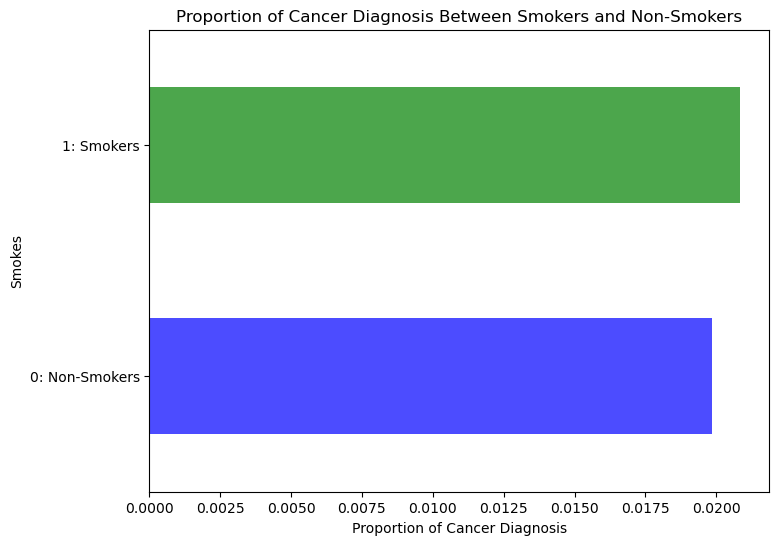

In [16]:
grouped = cancer.groupby('smokes')['dx_cancer'].mean()
plt.figure(figsize=(8, 6))
grouped.plot(kind='barh', stacked=True, color=['blue', 'green'], alpha=0.7)
plt.yticks([0, 1], ['0: Non-Smokers', '1: Smokers'])
plt.xlabel('Proportion of Cancer Diagnosis')
plt.ylabel('Smokes')
plt.title('Proportion of Cancer Diagnosis Between Smokers and Non-Smokers')
plt.show()

The green bar representing smokers appears to be taller than the blue bar representing non-smokers. This suggests that a higher proportion of smokers in the dataset have been diagnosed with cancer compared to non-smokers.

#### Cancer Diagnosis in Relation to the Number of Sexually Transmitted Diseases (STDs)

The scatter plot illustrates the relationship between the number of sexually transmitted diseases (STDs) and the diagnosis of cancer, helping to discern any potential association between these two variables.

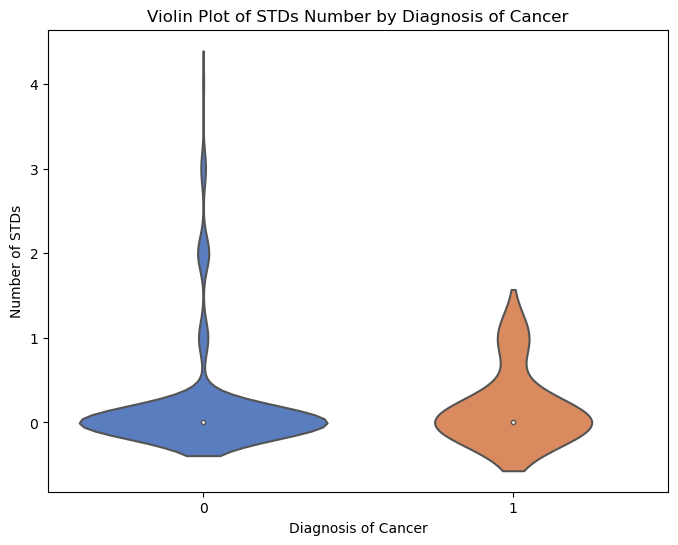

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='dx_cancer', y='stds_number', data=cancer, palette='muted')
plt.xlabel('Diagnosis of Cancer')
plt.ylabel('Number of STDs')
plt.title('Violin Plot of STDs Number by Diagnosis of Cancer')
plt.show()

The distribution of the number of STDs appears to differ between individuals diagnosed with cancer (dx_cancer = 1) and those not diagnosed with cancer (dx_cancer = 0). For individuals diagnosed with cancer (Dx_Cancer = 1), the distribution of the number of STDs seems to have a broader spread compared to those not diagnosed with cancer. This suggests that individuals diagnosed with cancer tend to have a wider range of STDs.

#### A Comparative Analysis of Smokers and Non-Smokers by Age

This visualization illustrates the distribution of ages among patients categorized by their smoking status, showcasing potential differences in age between smokers and non-smokers.

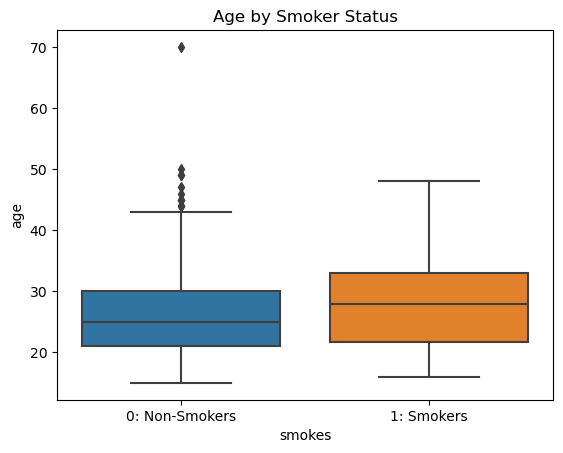

In [18]:
sns.boxplot(x='smokes', y='age', data=cancer)
plt.xticks([0, 1], ['0: Non-Smokers', '1: Smokers'])
plt.title('Age by Smoker Status')
plt.show()

There is not much significant difference in the age of people and smoking status. From the boxplot above, it can be deduced that the median age of non-smokers appears to be slightly higher than that of smokers. Additionally, the age range for non-smokers seems to be wider, indicating a more diverse age distribution compared to smokers. There are also outliers present in both groups, suggesting the presence of individuals with ages significantly different from the majority within each category.

### Three Variable Visualisations

#### Comparative Analysis of Age, Usage of Hormonal Contraceptives, and Biopsy Results

This analysis explores potential correlations between age, the usage of hormonal contraceptives, and biopsy results, aiming to uncover insights into their interplay.

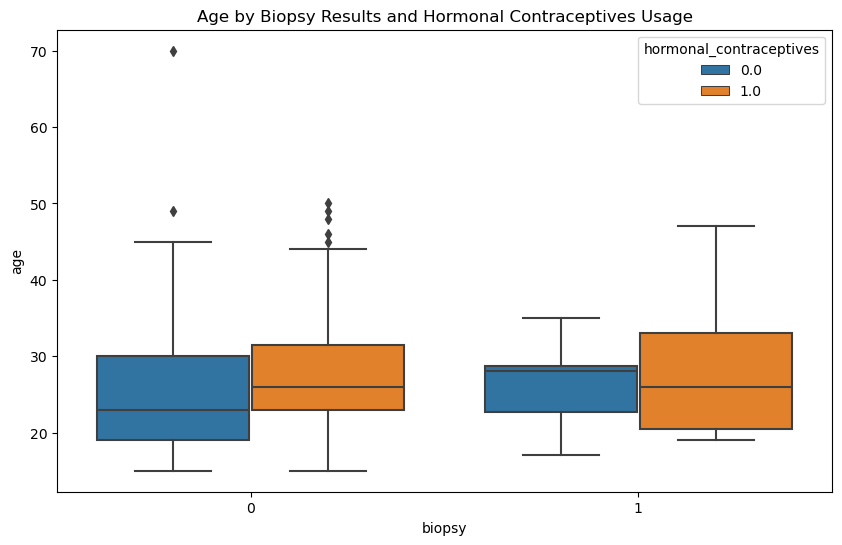

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='biopsy', y='age', hue='hormonal_contraceptives', data=cancer)
plt.title('Age by Biopsy Results and Hormonal Contraceptives Usage')
plt.show()

The box plot illustrates the distribution of ages for individuals who tested positive (biopsy=1) and those who tested negative (biopsy=0) for biopsy results. The plot also distinguishes between individuals who used hormonal contraceptives (hormonal_contraceptives=1.0) and those who did not (hormonal_contraceptives=0.0). The group with positive biopsy results (biopsy=1), individuals who used hormonal contraceptives (hormonal_contraceptives=1) seem to have a slightly higher median age compared to those who did not use them. Also, we see that with the use of Hormonal contraceptives, more patients were diagnosed with cervical cancer specially for the age 20-32.

#### Exploring the Relationship Between Age, Number of Sexual Partners, and STDs

This analysis aims to investigate the association between age, the number of sexual partners, and the occurrence of sexually transmitted diseases (STDs). 

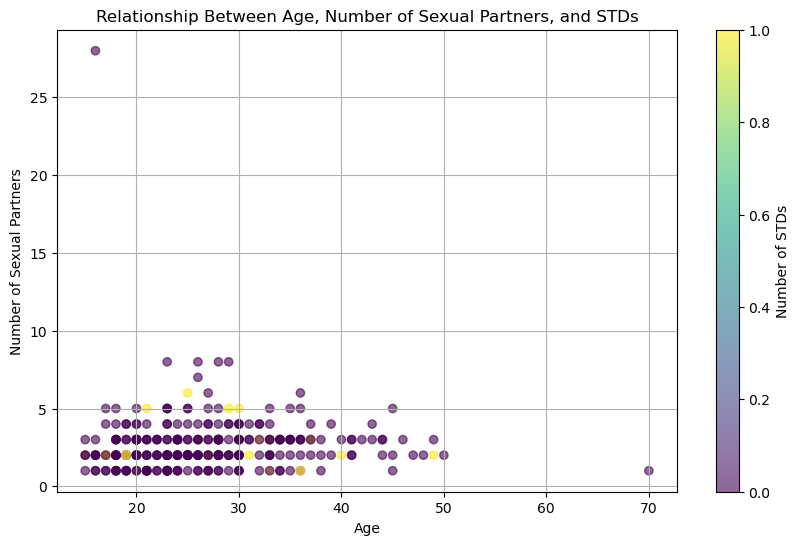

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(cancer['age'], cancer['number_of_sexual_partners'], c=cancer['stds'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Number of STDs')
plt.xlabel('Age')
plt.ylabel('Number of Sexual Partners')
plt.title('Relationship Between Age, Number of Sexual Partners, and STDs')
plt.grid(True)
plt.show()

Most individuals have a relatively low number of sexual partners, with only a few individuals having a high number of partners. The color gradient indicates that individuals with a higher number of sexual partners tend to have a higher number of STDs. This suggests a positive correlation between the number of sexual partners and the risk of contracting STDs. We can infer that individuals aged between 20 and 40 years are more prevalent in the dataset compared to other age groups. There are some outliers where individuals have a relatively high number of sexual partners but a low number of STDs, and vice versa. This could be due to various factors such as safe sexual practices or differences in susceptibility to STDs.

#### Visualisations to see the relationship between Number of pregnancies, Hormonal Contracpetives and Schiller test Result

Visualising the association between the number of pregnancies, usage of hormonal contraceptives, and the Schiller test result using a 3D Scatter plot to explore potential correlations between these variables.

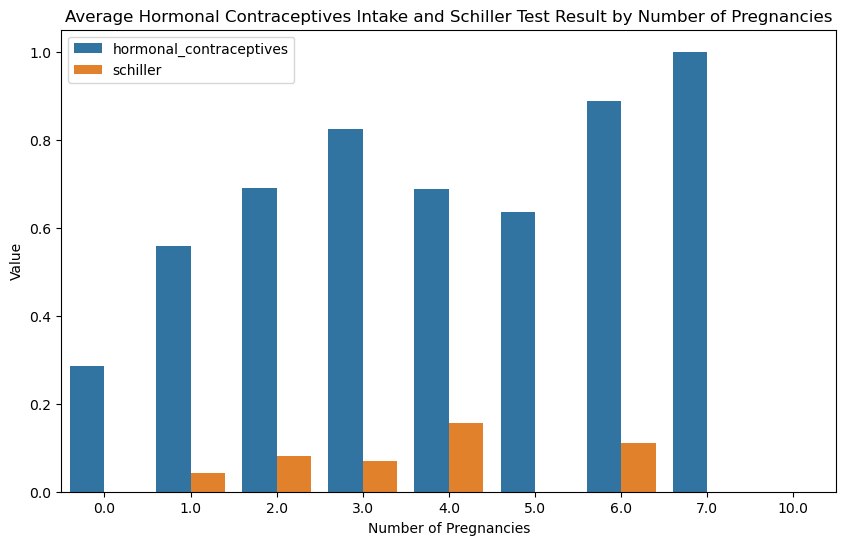

In [21]:
grouped_data = cancer.groupby('num_of_pregnancies')[['hormonal_contraceptives', 'schiller']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='num_of_pregnancies', y='value', hue='variable', data=pd.melt(grouped_data, id_vars=['num_of_pregnancies'], var_name='variable'))
plt.xlabel('Number of Pregnancies')
plt.ylabel('Value')
plt.title('Average Hormonal Contraceptives Intake and Schiller Test Result by Number of Pregnancies')
plt.legend(title=None, loc='upper left')
plt.show()

As the number of pregnancies increases, there is a general trend of an increase in the average hormonal contraceptives intake. Similarly, there is also a trend of an increase in the average Schiller test result with an increase in the number of pregnancies.

#### Final Visualisation to see the outcome of Schiller and Citology Test Result and compare them with Biopsy Tests



Finally we want to see how many people were diagnosed with cancer for Schiller and Citology test Result and further what was the result of the Final Biopsy. All these tests were almost consistent with the final outcome of the biopsy

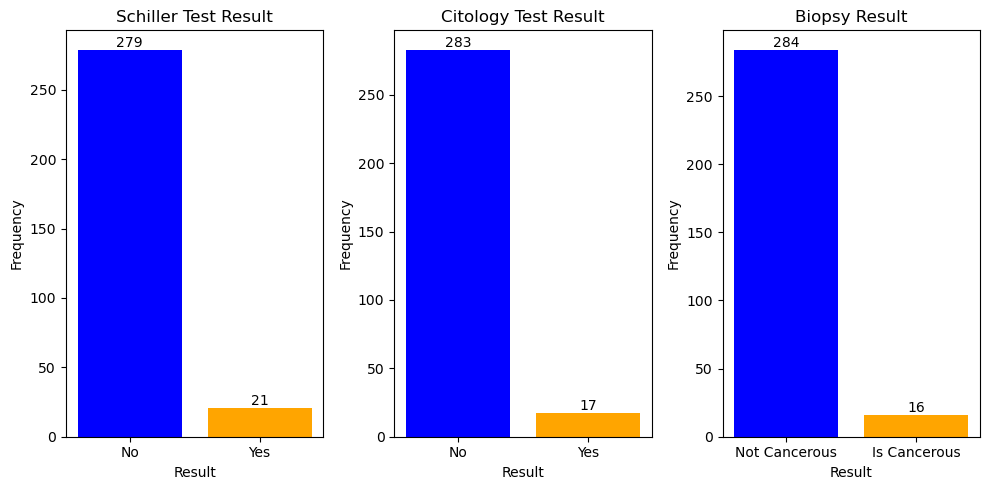

In [22]:

schiller_number = cancer['schiller'].value_counts()
citology_number = cancer['citology'].value_counts()
biopsy_number = cancer['biopsy'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
bars = plt.bar(schiller_number.index, schiller_number.values, color=['blue', 'orange'])
plt.title('Schiller Test Result')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')
plt.subplot(1, 3, 2)
bars = plt.bar(citology_number.index, citology_number.values, color=['blue', 'orange'])
plt.title('Citology Test Result')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.subplot(1, 3, 3)
bars = plt.bar(biopsy_number.index, biopsy_number.values, color=['blue', 'orange'])
plt.title('Biopsy Result')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Cancerous', 'Is Cancerous'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')


plt.tight_layout()
plt.show()


### Literature Review 

Cervical cancer is the second most prevalent cancer in women worldwide and a leading source of morbidity and death. Up until recently, the introduction and execution of screening programmes have resulted in the biggest advancements in the reduction of cervical cancer mortality. Additionally, a great deal of progress has been made in the detection and management of cervical cancer (Moore, 2006).

There have been many studies conducted which are covered below discussing the occurrence of Cervical cancer in women with various smoking habits, sexual history and the use of contraceptives supporting our cervical cancer database which we used for conducting our analysis. 

There has been a trend noticed in patients with cervical cancer and their smoking habits. After analysing a cohort of 3,187 women, Syrjänen et al. concluded in 2007 that smoking was not an independent risk factor of CIN2, except for patients who tested positive for HR-HPV (high-risk HPV). CIN 2 is a Biopsy finding that indicates the presence of abnormal cells in the cervix (Https://Www.cancer.gov/Publications/Dictionaries/Cancer-Terms/Def/Cin-2, 2011).  In a multivariate model, current smoking is still an independent predictor for those patients, which is consistent with a previous study by Harris et al. (2004) found smoking was associated with risk for both CIN1 and CIN2-3. The smoking status, number of pack years of exposure, and number of cigarettes per day (>10) were the three smoking indicators that showed the strongest correlation with risk for CIN1 and CIN2-3. This study found no evidence that an immune reaction mediated the link between daytime cigarette smoking and CIN. According to Mautinho (2011), smoking may have a particular negative impact on cervical carcinogenesis caused by HR-HPV.

The development of cervical cancer is linked to the use of hormonal contraception. After examining 24 international studies involving 16,573 women with cervical cancer and 35,509 women without the disease, Appleby et al. (2007) concluded that women who currently use oral contraceptives have a higher relative risk of developing cervical cancer and that this risk is even higher in those who smoke. A study by Spotnitz et al. published in the journal Obstetrics & Gynaecology (2020)  indicated that patients who used copper intrauterine devices (IUDs) had a decreased incidence of high-grade cervical neoplasms compared to users of the levonorgestrel-releasing intrauterine system (American Society of Clinical Oncology, 2020). 
According to the International Conference of Health Informatics (2018), HPV Cervical lesions that are precancerous or cancerous are primarily caused by infection with high-risk or oncogenic HPV strains. The majority of cervical cancer cases are caused by HPV16 and 18 infection. Human populations are shown to have a significant prevalence of high-risk kinds, particularly HPV16 (Oaknin, et al., 2019). Sexual contact is the usual means of transmission of the infection, which results in squamous intraepithelial lesions. Because of immunological intervention, most lesions go away after 6–12 months. A tiny portion of these lesions, though, still exist and may develop into cancer ( Zhang et al.,2020). 

Research conducted by the Department of Genitourinary Medicine in the University College Hospital of London (1990) The connections between coitus and cervical cancer were starting to come into focus. Thereafter, several case controls of epidemiological studies were conducted to look for connections between the illness and aspects of female sexuality. The two main factors that distinguished between women with and without cervical cancer were found to be coitarche at the age of 17 or younger and the total number of sexual partners in one's lifetime. There were no correlations with the frequency of coitus, menstrual cycles, or the quantity of births, pregnancies, or abortions. Surprisingly there have been links found between many marriages, unstable marriages, and a history of sexually transmitted diseases (STDs) and cervical cancer; however, these were considered to be covariables of the number of sexual partners. (Shepherd et al., 2000). The information is consistent with the hypothesis that one or more sexually transmitted infections are responsible for all or part of cervical cancer. There has been substantial discussion on the relative significance of age at coitarche. There is a claim that a young woman's cervical epithelium, which is going through squamous metaplasia, makes it particularly susceptible to the impacts of STDs. If this were the case, it would be expected that the incidence of cervical cancer would increase with younger coitarche (Poznanski & Williams, n.d.). 

Finally, the screening for cervical cancer has been a long evolving process. Various tests are conducted to confirm the presence of the HR-HPV virus. PAP- smear tests and cytology are the most common ones. According to Johns Hopkins Medicine, cytology can be defined as the scraping of tissue during the PAP-smear exam to check for fatal abnormalities to detect cancer (Cytology, n.d.). Comprehensive data analysis from several of the world's largest screening programs was carried out by the International Agency for Research on Cancer (IARC) in 1986 (Herrero et al, nd) The analysis demonstrated the effectiveness of well-organized, cytology-based screening programmes in lowering the incidence and mortality of cervical cancer (Hakama et al1985). 





## Summary and Conclusion

The challenge of accurately predicting cervical cancer risk holds profound implications for global public health, especially among women, given its significant morbidity and mortality rates. While screening programs have made notable strides in reducing mortality, there remains a critical need for advancements in early detection and intervention strategies. This project endeavors to address this need by harnessing machine learning techniques to develop a predictive model capable of identifying individuals at heightened risk of cervical cancer. Leveraging demographic, clinical, and pathological features, the model aims to revolutionize early detection efforts and ultimately improve treatment outcomes.

In Phase I of the project, emphasis was placed on data cleaning, preprocessing, and exploratory data analysis (EDA). Irrelevant variables were removed, and data integrity was ensured by addressing missing values and outliers. Through EDA, insights into the distribution and relationships within the dataset were gleaned, laying the foundation for subsequent modeling endeavors. Notably, visualisations provided valuable insights into trends such as the prevalence of cervical cancer risk factors across different demographic groups and the impact of certain behaviors on disease incidence.

The findings from Phase I underscore the importance of further analysis and model refinement in Phase II. While initial explorations have revealed key predictors of cervical cancer risk, such as smoking habits, hormonal contraceptive use, and sexual history, additional investigation is warranted to uncover nuanced relationships and enhance predictive accuracy. Through continued collaboration and data-driven insights, this project aims to empower healthcare professionals with a robust predictive model capable of identifying high-risk individuals, thereby advancing efforts to combat cervical cancer and ultimately save lives.

## References 

kaggle.com. (n.d.). Predicting Cervical Cancer ( Acc = 0.92% ). [online] Available at: https://www.kaggle.com/code/ranzeet013/predicting-cervical-cancer-acc-0-92#Model-Selection-And-Training-: [Accessed 20 Apr. 2024].

Lecture and Tutorial notes 

#### Reference For Literature Review


Appleby, P., Beral, V., & Berrington, A. (2007). Cervical cancer and hormonal contraceptives: collaborative reanalysis of individual data for 16 573 women with cervical cancer and 35 509 women without cervical cancer from 24 epidemiological studies. The Lancet, 370(9599), 1609–1621. https://doi.org/10.1016/s0140-6736(07)61684-5

Bird, G., Correy, L., Evans, B. A., & Judson, F. (1990). Genitourinary Medicine. 65.
Cohen, P. A., Jhingran, A., Oaknin, A., & Denny, L. (2019). Cervical cancer. The Lancet, 393(10167), 169–182. https://doi.org/10.1016/s0140-6736(18)32470

-x
Cytology. (n.d.). Www.hopkinsmedicine.org. https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/cytology#:~:text=Cytology%20is%20the%20exam%2

0of
Denny L, Herrero R, Levin C, Kim JJ. Cervical Cancer. In: Cancer: Disease Control Priorities, Third Edition (Volume 3). The International Bank for Reconstruction and Development / The World Bank, Washington (DC); 2015. PMID: 269133

49. 
Fonseca-Moutinho, J. A. (2011). Smoking and Cervical Cancer. ISRN Obstetrics and Gynecology, 370, 1–6. https://doi.org/10.5402/2011/847684
Harris, T. G. (2004). Cigarette Smoking, Oncogenic Human Papillomavirus, Ki-67 Antigen, and Cervical Intraepithelial Neoplasia. American Journal of Epidemiology, 159(9), 834–842. https://doi.org/10.1093/aje/

kwh115
https://www.cancer.gov/publications/dictionaries/cancer-terms/def/cin-2. (2011, February 2). Www.cance
r.gov. https://www.cancer.gov/publications/dictionaries/cancer-terms/de

f/cin-2
Miller, A. B., & Hakama, H. (1985). Screening for Cancer. Orlando; Toronto: Academi

c Press.
Moore, D. H. (2006). Cervical Cancer. Obstetrics & Gynecology, 107(5), 1152–1161. https://doi.org/10.1097/01.aog.0000215986

.48590.79
Oriel, J. D. (1988). Sex and cervical cancer. Sexually Transmitted Infections, 64(2), 81–89. https://doi.org/10.1136/s

ti.64.2.81
Poznanski, D., & Williams, M. (n.d.). 2022 International Cancer Education Conference Program and Abstract. Journal of Cancer Education. International Cancer Education Conference, College Park, Mar

yland, USA.
Risk of Cervical Cancer With Different Types of Intrauterine Devices - The ASCO Post. (2020, March 17). Ascopost.com. https://ascopost.com/news/march-2020/risk-of-cervical-cancer-with-different-types-of-intrauter

ine-devices/
Shepherd, J., Peersman, G., Weston, R., & Napuli, I. (2000). Cervical cancer and sexual lifestyle: a systematic review of health education interventions targeted at women. Health Education Research, 15(6), 681–694. https://doi.org/10.1093

/her/15.6.681
Spotnitz, M. E., Natarajan, K., Ryan, P. B., & Westhoff, C. L. (2020). In Reply. Obstetrics & Gynecology, 135(6), 1487–1487. https://doi.org/10.1097/aog.00

00000000003912
Syrjänen, K., Shabalova, I., Petrovichev, N., Kozachenko, V., Zakharova, T., Pajanidi, J., Podistov, J., Chemeris, G., Sozaeva, L., Lipova, E., Tsidaeva, I., Ivanchenko, O., Pshepurko, A., Zakharenko, S., Nerovjna, R., Kljukina, L., Erokhina, O., Branovskaja, M., Nikitina, M., & Grunberga, V. (2007). Smoking is an independent risk factor for oncogenic human papillomavirus (HPV) infections but not for high-grade CIN. European Journal of Epidemiology, 22(10), 723–735. https://doi.org/10.1007/s1

0654-007-9180-8
Zhang, S., Xu, H., Zhang, L., & Qiao, Y. (2020). Cervical cancer: Epidemiology, Risk Factors and Screening. Chinese Journal of Cancer Research, 32(6), 720–728. https://doi.org/10.21147/j.issn.1000-9604.2020.06.05
